In [1]:
from obstacle_tower_env import ObstacleTowerEnv
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
env = ObstacleTowerEnv('./ObstacleTower/obstacletower', retro=False)

INFO:mlagents.envs:
'ObstacleTower-v1' started successfully!
Unity Academy name: ObstacleTower-v1
        Number of Brains: 1
        Number of Training Brains : 1
        Reset Parameters :
		dense-reward -> 1.0
		tower-seed -> -1.0
		floor-number -> 0.0
Unity brain name: LearningBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space size (per agent): 7
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): [3, 3, 2, 3]
        Vector Action descriptions: Movement Forward/Back, Camera, Jump, Movement Left/Right
INFO:gym_unity:1 agents within environment.


In [3]:
# The environment provided has a MultiDiscrete action space, where the 4 dimensions are:
# 0. Movement Forward/Back
# 1. Camera Rotation
# 2. Jump
# 3. Movement Left/Right

env.action_space

MultiDiscrete([3 3 2 3])

In [4]:
# The observation space provided includes a 168x168 image (the camera from the simulation)
# as well as the number of keys held by the agent (0-5) and the amount of time remaining.
env.observation_space

Tuple(Box(168, 168, 3), Discrete(5), Box(1,))

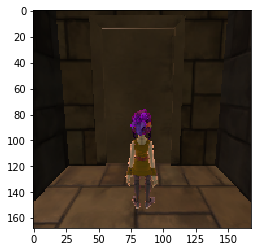

In [5]:
obs = env.reset()
plt.imshow(obs[0])

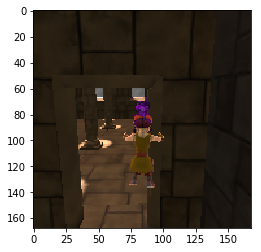

In [9]:
obs, reward, done, info = env.step(env.action_space.sample())
plt.imshow(obs[0])

In [10]:
env.close()

In [11]:
env = ObstacleTowerEnv('./ObstacleTower/obstacletower', retro=True)

INFO:mlagents.envs:
'ObstacleTower-v1' started successfully!
Unity Academy name: ObstacleTower-v1
        Number of Brains: 1
        Number of Training Brains : 1
        Reset Parameters :
		floor-number -> 0.0
		dense-reward -> 1.0
		tower-seed -> -1.0
Unity brain name: LearningBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space size (per agent): 7
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): [3, 3, 2, 3]
        Vector Action descriptions: Movement Forward/Back, Camera, Jump, Movement Left/Right
INFO:gym_unity:1 agents within environment.


In [12]:
# In retro mode, the observation is an 84x84 image with the time remaining and key count visually embedded.
env.observation_space

Box(84, 84, 3)

In [13]:
env.reset()

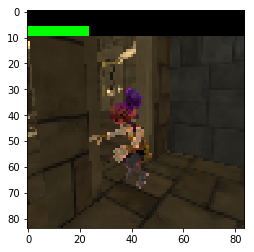

In [19]:
obs, reward, done, info = env.step(env.action_space.sample())
plt.imshow(obs)

In [20]:
env.close()